In [1]:
import pandas as pd
import string
import joblib
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("chatgpt_reviews - chatgpt_reviews.csv")

In [4]:
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [5]:
df["clean_review"] = df["review"].apply(clean_text)

In [6]:
def map_sentiment(r):
    if r <= 2:
        return "Negative"
    elif r == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_review"], df["sentiment"], test_size=0.2, random_state=42)

In [8]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])

In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression())])

In [10]:
joblib.dump(pipeline, "model_pipeline.pkl")

['model_pipeline.pkl']

In [11]:
from sklearn.metrics import confusion_matrix

In [13]:
y_pred=pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=["Negative", "Neutral", "Positive"])

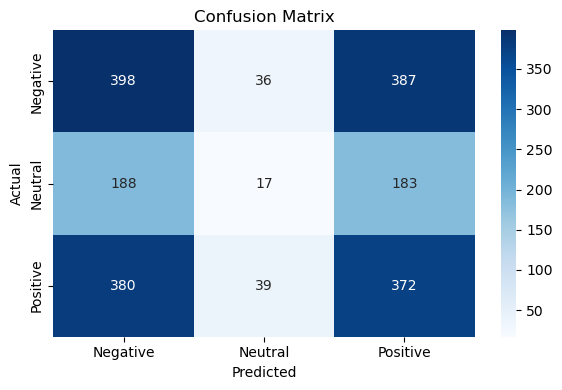

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")

In [15]:
import seaborn as sns

In [17]:
from sklearn.metrics import classification_report

In [18]:
report = classification_report(y_test, y_pred, output_dict=True)
joblib.dump(report, "classification_report.pkl")

['classification_report.pkl']

In [19]:
import streamlit as st

In [20]:
with st.expander("View Confusion Matrix"):
    st.image("confusion_matrix.png", caption="Model Confusion Matrix")

with st.expander("Classification Report"):
    report = joblib.load("classification_report.pkl")
    st.json(report)

2025-05-08 11:01:36.734 
  command:

    streamlit run c:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [21]:
st.write("Word Cloud by Sentiment")
sentiment_type = st.selectbox("Choose Sentiment", ["Positive", "Neutral", "Negative"])
text = " ".join(df[df["sentiment"] == sentiment_type]["review"].dropna().astype(str))

2025-05-08 11:02:00.355 Session state does not function when running a script without `streamlit run`


In [22]:
from wordcloud import WordCloud

In [23]:
wordcloud = WordCloud(max_words=100, background_color="white", width=600, height=400).generate(text)
st.image(wordcloud.to_array(), use_column_width=True)

DeltaGenerator()